In [2]:
#New dataframe that looked at both race an class

import pandas as pd
import numpy  as np
import json
import sys 

# Plotting packages
from   mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn           as sns
custom_style = {"axes.spines.right": False, "axes.spines.top": False,}
sns.set_style("ticks", rc=custom_style)

# Statistical packages
import scipy.stats           as stats
from scipy.cluster           import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn                 import preprocessing
from sklearn.cluster         import KMeans
from sklearn.metrics         import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.decomposition   import PCA


# Other packages
from IPython.display import clear_output

df = pd.read_csv('cleaned_data.csv')


In [3]:
# new variable name
new_df=df[['demo_race','demo_class']]

# Clean the race column by splitting it from strings to a list of string
new_df.loc[:, 'demo_race'] = new_df['demo_race'].str.split(', ')


C:\Users\moral\AppData\Local\Temp\ipykernel_18208\213427524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'demo_race'] = new_df['demo_race'].str.split(', ')


In [4]:
# Explode the demo_race column in order to expand the datafram 
new_df = new_df.explode('demo_race')

# We are also resetting the index of the dataframe
new_df = new_df.reset_index(drop=True)


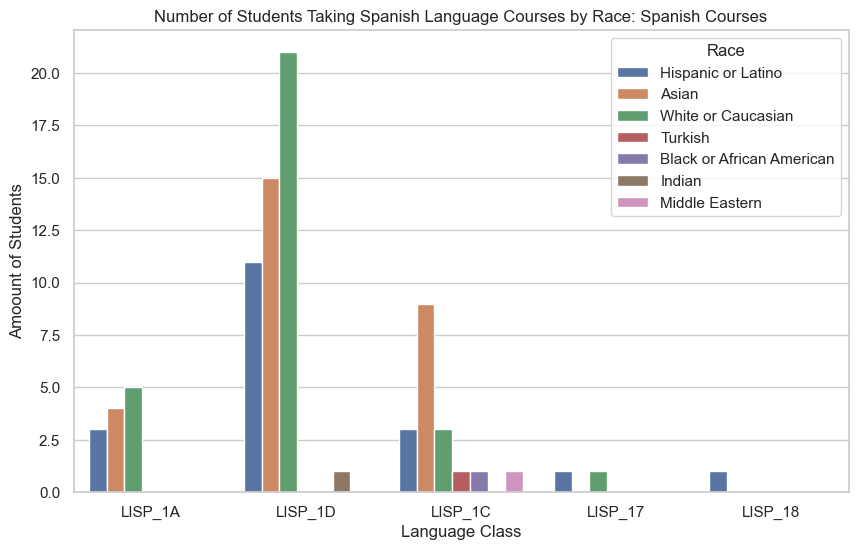

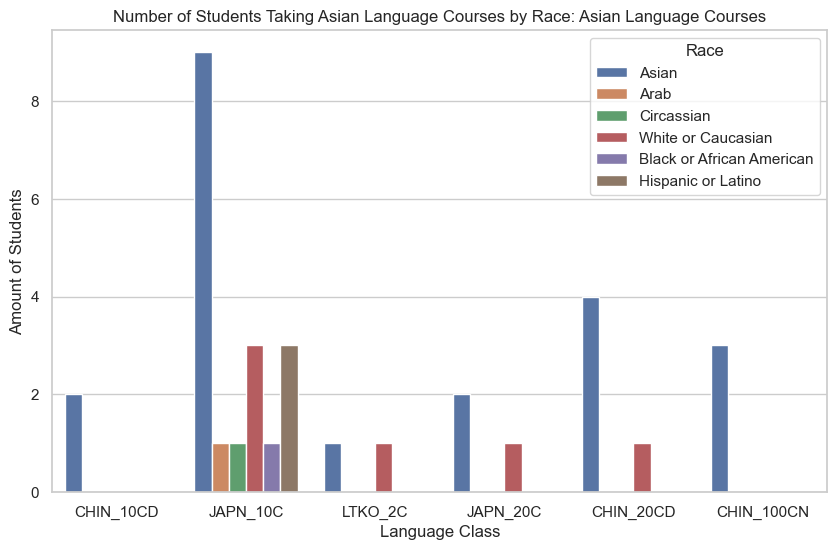

In [5]:
# Setting plot style
sns.set(style = 'darkgrid')
sns.set(style =  'whitegrid')

# Split the data ito two sets
subset1 = new_df[new_df['demo_class'].isin(['LISP_1A', 'LISP_1D', 'LISP_1C', 'LISP_17', 'LISP_18'])]
subset2 = new_df[new_df['demo_class'].isin(['CHIN_10CD', 'JAPN_10C', 'LTKO_2C', 'JAPN_20C', 'CHIN_20CD', 'CHIN_100CN'])]


# Create the first graph with the subset 1 data
plt.figure(figsize=(10, 6))
sns.countplot(data=subset1, x='demo_class', hue='demo_race')
plt.title('Number of Students Taking Spanish Language Courses by Race: Spanish Courses')
plt.xlabel('Language Class')
plt.ylabel('Amoount of Students')
plt.legend(title='Race', loc='upper right')
plt.show()

# Create the second graph with subset 2 data
plt.figure(figsize=(10, 6))
sns.countplot(data=subset2, x='demo_class', hue='demo_race')
plt.title('Number of Students Taking Asian Language Courses by Race: Asian Language Courses')
plt.xlabel('Language Class')
plt.ylabel('Amount of Students')
plt.legend(title='Race', loc='upper right')
plt.show()


# The plot
plt.show()